# Neural Network From Scratch Using Python for Digits Classification (no TF, Keras, PyTorch, NeuroLab)

In this notebook, we will explore the process of building a neural network from scratch using Python. Neural networks are powerful machine learning models that can learn complex relationships in data. They have been applied for various tasks, including image classification, natural language processing, and prediction.

While there are many libraries and frameworks available for training neural networks, it can be valuable to understand how they work under the hood. We will start by introducing the fundamental concepts and mathematics behind neural networks and then implement a simple neural network using Python and the NumPy library. We will then apply our neural network to MNIST dataset for digits classification.

## Diagram

In general, neural network diagram/architecture is pretty much look like this. 

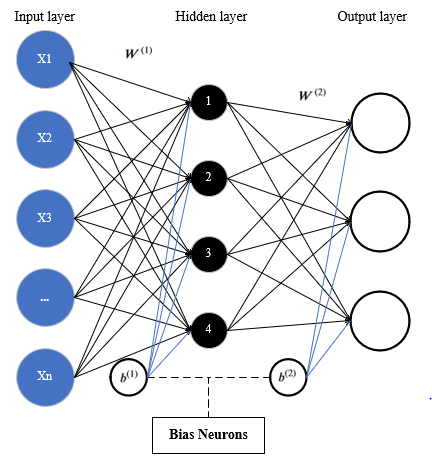


It consists of input layer, hidden layer, and output layer. Some networks have more than 1 hidden layer, but in this project we only use 1 hidden layer.


In the above picture, the lines connecting each neuron on one layer to the neurons on the other layers are called weights. There are also bias neurons (b1 and b2).

# Math
## Feed Forward

The neural network does the signal processing by multiplying the input signals, summing them with the bias neurons, and then applying the activation function to obtain the outputs. This process is also known as forward propagation.

For a more obvious explanation, let's examine the below picture:

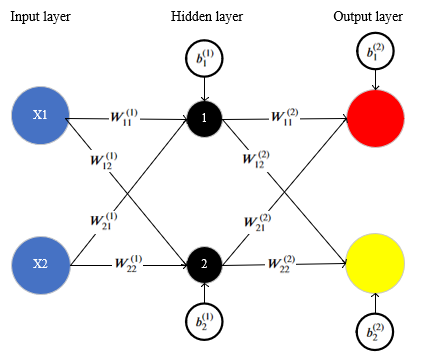

First, let's calculate the output from the first hidden neuron $\big(A_1^{(1)}\big)$

$$Z_1^{(1)}=x_1*w_{11}^{1}+x_2*w_{21}^{1}+b_{1}^1$$
$$A_1^{(1)}=f\big(Z_1^{(1)}\big)$$

We can calculate the second hidden neuron output $\big(A_2^{(1)}\big)$ in the same way 

$$Z_2^{(1)}=x_1*w_{12}^{1}+x_2*w_{22}^{1}+b_{2}^1$$
$$A_2^{(1)}=f(Z_2^{(1)})$$

We can write the process of calculating the output of each hidden neuron in the form of matrix multiplication
$$\begin{bmatrix}
Z_1^{(1)}&
Z_2^{(1)}
\end{bmatrix}=
\begin{bmatrix}
x_{1}&x_{2} 
\end{bmatrix} * 
\begin{bmatrix}
w_{11}^{1} & w_{12}^1\\
w_{21}^1 & w_{22}^1
\end{bmatrix}+
\begin{bmatrix}
b_{1}^1&b_2^{1}
\end{bmatrix}=x*W^{(1)}+b^1
$$

$$\begin{bmatrix}
A_1^{(1)}&
A_2^{(1)}
\end{bmatrix}=
f\begin{bmatrix}
Z_1^{(1)}&
Z_2^{(1)}
\end{bmatrix}=
\begin{bmatrix}
f{\big(Z_1^{(1)}\big)}&
f{\big(Z_2^{(1)}\big)}
\end{bmatrix}$$

We can then calculate the output of the neural network
$$\begin{bmatrix}
Z_1^{(2)}&
Z_2^{(2)}
\end{bmatrix}=
\begin{bmatrix}
A_1^{(1)}&A_2^{(1)} 
\end{bmatrix} * 
\begin{bmatrix}
w_{11}^{2} & w_{12}^2\\
w_{21}^2 & w_{22}^2
\end{bmatrix}+
\begin{bmatrix}
b_{1}^2&b_2^{2}
\end{bmatrix}=A^{(1)}*W^{(2)}+b^2
$$

$$\begin{bmatrix}
A_1^{(2)}&
A_2^{(2)}
\end{bmatrix}=
f\begin{bmatrix}
Z_1^{(2)}&
Z_2^{(2)}
\end{bmatrix}=
\begin{bmatrix}
f{\big(Z_1^{(2)}\big)}&
f{\big(Z_2^{(2)}\big)}
\end{bmatrix}$$

Here is the summary of the whole feed forward process

$$Z^{(1)} = X W^{(1)}  + b^{(1)}$$
$$A^{(1)} = f\big(Z^{(1)}\big)$$
$$Z^{(2)} = A^{(1)} W^{(2)}  + b^{(2)}$$
$$A^{(2)} = f\big(Z^{(2)}\big)$$

$f(v)$ is the activation function. In the hidden layer we will use the sigmoid function and in the output layer we will use the sotmax function

**Sigmoid function**
$$f_{\text{sigmoid}}(x) = \frac 1{1 + e^{-x}}$$

**Softmax function**
$$f_{\text{softmax}}(x) = \frac {e^{a_i}}{\sum \limits _{j=1} ^{N} e^{a_j}}$$

# Loss Function
Once we obtain the output (prediction) of the neural network, we need to know how good the model we've already created is. To measure how good our model is, we can use a function called the Loss Function.

The Loss Function is a mathematical function that represents the error of our model. The bigger the Loss Function is, the greater the error. The purpose of training a neural network is to minimize the Loss Function.

There are several forms of loss functions, but in this project, we will use the Cross-Entropy function. 
The mathematical form of Cross-Entropy function is given by

**Cross-Entropy**
$$L=-y\ln{A} - (1-y)\ln{(1-A)}$$
Where:

$y$ = Target/the expected output

$A$ = Model's output

# Gradient Descent

When training a neural network, we change its parameters (weights and biases) to minimize the loss function. Here is the equation for updating the parameters of a neural network:
$$W^{(1)}=W^{(1)} - \alpha\frac{\partial L}{\partial W^{(1)}}$$

$$W^{(2)}=W^{(2)} - \alpha\frac{\partial L}{\partial W^{(2)}}$$

$$b^{(1)}=b^{(1)} - \alpha\frac{\partial L}{\partial b^{(1)}}$$

$$b^{(2)}=b^{(2)} - \alpha\frac{\partial L}{\partial b^{(2)}}$$

$\alpha$ on the above equation is the learning rate. The learning rate is a hyperparameter, which means we don't change its value during the training process. The value of alpha is always less than 1. Generally, the value of alpha is set in the range from $10^{-5}$ to $10^{-3}$.


The equation above is derived from the gradient descent algorithm. We know that the first derivative of a function is the gradient/slope of that function. Thus, the first derivative of the loss function $\big(\frac {\partial L} {\partial W^{(1)}}\big)$, $\big(\frac {\partial L} {\partial W^{(2)}}\big)$, $\big(\frac {\partial L} {\partial b^{(1)}}\big)$, dan $\big(\frac {\partial L} {\partial b^{(2)}}\big)$ is none other than its gradient.

Now comes the question, how can we calculate the gradient/slope of the loss function? It is where the backpropagation algorithm comes in. The backpropagation algorithm gives us a systematic way to calculate the slope of the loss function.


# Backpropagation
In this process we calculate the derivative/gradient of the loss function with respect to our parameters ($W^{(1)}, W^{(2)}, b^{(1)}, b^{(2)}$)

**Loss Function (L)**
**$$L=-y\ln{f{(Z^{(2)}})} - (1-y)\ln{(1-{f{(Z^{(2)}})})}$$**

We know that $L$ is basically a function of  $W^{(1)}, W^{(2)}, b^{(1)}, b^{(2)}$, thus we can compute the gradients of $L$ using the chain rule. This process is going to be like this:

$$\frac{\partial L}{\partial W^{(2)}}=\frac{\partial L}{\partial Z^{(2)}}\frac{\partial {Z^{(2)}}}{\partial W^{(2)}}$$


$$\frac{\partial L}{\partial b^{(2)}}=\frac{\partial L}{\partial Z^{(2)}}\frac{\partial {Z^{(2)}}}{\partial b^{(2)}}$$


$$\frac{\partial L}{\partial W^{(1)}}=\frac{\partial L}{\partial Z^{(2)}}\frac{\partial {Z^{(2)}}}{\partial A^{(1)}}
\frac{\partial A^{(1)}}{\partial Z^{(1)}}\frac{\partial Z^{(1)}}{\partial W^{(1)}}$$


$$\frac{\partial L}{\partial b^{(1)}}=\frac{\partial L}{\partial Z^{(2)}}\frac{\partial {Z^{(2)}}}{\partial A^{(1)}}
\frac{\partial A^{(1)}}{\partial Z^{(1)}}\frac{\partial Z^{(1)}}{\partial b^{(1)}}$$

## Let's calculate those derivatives one by one
## Calculation of *$\frac{\partial L}{\partial Z^{(2)}}$*

Recall that:
$$L=-y\ln{f_\text{softmax}{(Z^{(2)}})} - (1-y)\ln{(1-{f_\text{softmax}{(Z^{(2)}})})}$$

So for the ith component of L the gradient is:
$$\frac{\partial L_i}{\partial Z_i^{(2)}}=\frac{-y_i}{f_\text{softmax}{(Z_1^{(2)})}}\frac{\partial f_\text{softmax}{(Z_i^{(2)})}}{\partial Z_i^{(2)}} - \frac{(1-y_i)}{(1-{f_\text{softmax}{(Z_i^{(2)}})})} \frac{\partial f_\text{softmax}{(1-Z_i^{(2)})}}{\partial Z_i^{(2)}}$$
for softmax activation:
$$\frac{\partial f_\text{softmax}{(Z_i^{(2)})}}{\partial Z_i^{(2)}}=f_\text{softmax}{(Z_i^{(2)})}(1-f_\text{softmax}{(Z_i^{(2)})})$$
By substituting this fact to gradient equation, we get:
$$\frac{\partial L_i}{\partial Z_i^{(2)}}=\frac{-y_i}{f_\text{softmax}{(Z_i^{(2)})}}\frac{\partial f_\text{softmax}{(Z_i^{(2)})}}{\partial Z_i^{(2)}} - \frac{(1-y_i)}{(1-{f_\text{softmax}{(Z_i^{(2)}})})} \frac{\partial f_\text{softmax}{(1-Z_i^{(2)})}}{\partial Z_i^{(2)}}$$


$$\frac{\partial L_i}{\partial Z_i^{(2)}}=\frac{-y_i}{f_\text{softmax}{(Z_i^{(2)})}}\left[f_\text{softmax}{\Big(Z_i^{(2)}}\Big)  \Big(1-f_\text{softmax}{\Big(Z_i^{(2)}\Big)}\right]+ \frac{(1-y_i)}{(1-{f_\text{softmax}{(Z_i^{(2)}})})} \left[f_\text{softmax}{\Big(Z_i^{(2)}\Big)}  \Big(1-f_\text{softmax}{\Big(Z_i^{(2)}\Big)}\right]$$

for some rearrangement we will have:
$$
\frac{\partial L_i}{\partial Z_i^{(2)}}=f_\text{softmax}{\Big(Z_i^{(2)}\Big)} - y_i
$$




## Calculation of $\frac{\partial Z^{(2)}}{\partial W^{(2)}}$ and $\frac{\partial Z^{(2)}}{\partial b^{(2)}}$
We know that:
$$
Z^{(2)} = A^{(1)}W^{(2)}+b^{(2)}
$$
Hence:
$$
\frac{\partial Z^{(2)}}{\partial W^{(2)}}={A^{(1)}}^{T}
$$

$$
\frac{\partial Z^{(2)}}{\partial b^{(2)}}=1
$$



## Calculation of $\frac{\partial Z^{(2)}}{\partial A^{(1)}}$
We know that:
$$
Z^{(2)} = A^{(1)}W^{(2)}+b^{(2)}
$$
Hence:
$$
\frac{\partial Z^{(2)}}{\partial A^{(1)}}={W^{(2)}}^T
$$



## Calculation of $\frac{\partial A^{(1)}}{\partial Z^{(1)}}$
$$\frac{\partial A^{(1)}}{\partial Z^{(1)}} = A^{(1)}(1-A^{(1)})$$

## Calculation of $\frac{\partial Z^{(1)}}{\partial W^{(1)}}$ and $\frac{\partial Z^{(1)}}{\partial b^{(1)}}$
We know that:
$$
Z^{(1)} = XW^{(1)}+b^{(1)}
$$
Hence:
$$
\frac{\partial Z^{(1)}}{\partial W^{(1)}}=X^T
$$

$$
\frac{\partial Z^{(1)}}{\partial b^{(1)}}=1
$$



## Beware of the dimensions!!
Please notice that all the calculations we've just done are to get the value of each derivative. Since we are dealing with matrices, we also need to consider the dimensions of those matrices. If we disregard the dimensions of those matrices and just put them in the chain rule, we will get an error when coding them.

## Let's see the equation for updating parameters derived from the gradient descent algorithm

**For updating $W^{(2)}$ we have:**

$$W^{(2)}=W^{(2)} - \alpha\frac{\partial L}{\partial W^{(2)}}$$

From the equation, it's obvious that $W^{(2)}$ and $\frac{\partial L}{\partial W^{(2)}}$ should have the same dimension. This fact also holds for other parameters.

For convenience, let's create a table where we put the value of each variabel and its dimension.

|$$\text{Variables}$$                                                                  |$$\text{Dimension}$$       |
|--------------------------------------------------------------------------------------|---------------------------|
|$$X$$                                                                                 |$$\text{(M, input)}$$      |
|$$W^{(1)}$$                                                                           |$$\text{(input, hidden)}$$ |
|$$b^{(1)}$$                                                                           |$$\text{(1, hidden)}$$     |
|$$Z^{(1)}=X*W^{(1)}+b^{(1)}$$                                                         |$$\text{(M, hidden)}$$     |
|$$A^{(1)}=f_\text{sigmoid}\Big(Z^{(1)}\Big)$$                                         |$$\text{(M, hidden)}$$     |
|$$W^{(2)}$$                                                                           |$$\text{(hidden, output)}$$|
|$$b^{(2)}$$                                                                           |$$\text{(1, output)}     $$|
|$$Z^{(2)}=A^{(1)}*W^{(2)}+b^{(2)}$$                                                   |$$\text{(M, output)}     $$|
|$$A^{(2)}=f_\text{softmax}\Big(Z^{(2)}\Big)$$                                         |$$\text{(M, output)}     $$|
|$$L=-y\ln{f_\text{softmax}{(Z^{(2)}})} - (1-y)\ln{(1-{f_\text{softmax}{(Z^{(2)}})})}$$|$$\text{(M, output)}$$     |
|$$\frac{\partial L}{\partial Z^{(2)}}=f_\text{softmax}{\Big(Z_i^{(2)}\Big)} - y_i$$   |$$\text{(M, output)}$$     |
|$$\frac{\partial Z^{(2)}}{\partial W^{(2)}}={A^{(1)}}^{T}$$                           |$$\text{(output, M)}$$     |
|$$\frac{\partial Z^{(2)}}{\partial b^{(2)}}=\text{matrix with each of its component is 1}$$|$$\text{(1, M)}$$     
|$$\frac{\partial Z^{(2)}}{\partial A^{(1)}}={W^{(2)}}^T$$                             |$$\text{(output, hidden)}$$|
|$$\frac{\partial A^{(1)}}{\partial Z^{(1)}} = A^{(1)}(1-A^{(1)})$$                    |$$\text{(M, hidden)}$$     |
|$$\frac{\partial Z^{(1)}}{\partial W^{(1)}}=X^T$$                                     |$$\text{(input, M)}$$      |
|$$\frac{\partial Z^{(1)}}{\partial b^{(1)}}=\text{matrix with each of its component is 1}$$|$$\text{(1, M)}$$     |





Based on the table above, we can see that if we would like to calculate the value of $\frac{\partial L}{\partial W^{(2)}}$ we can use the equation
$$\frac{\partial L}{\partial W^{(2)}}=\frac{\partial {Z^{(2)}}}{\partial W^{(2)}}*\frac{\partial L}{\partial Z^{(2)}}$$
and for the other gradients
$$\frac{\partial L}{\partial b^{(2)}}=\frac{\partial {Z^{(2)}}}{\partial b^{(2)}}*\frac{\partial L}{\partial Z^{(2)}}$$

$$\frac{\partial L}{\partial W^{(1)}}=\frac{\partial Z^{(1)}}{\partial W^{(1)}}*\Bigg[\bigg(\frac{\partial L}{\partial Z^{(2)}}*\frac{\partial {Z^{(2)}}}{\partial A^{(1)}}\bigg)\odot\frac{\partial A^{(1)}}{\partial Z^{(1)}}\Bigg]$$

$$\frac{\partial L}{\partial b^{(1)}}=\frac{\partial Z^{(1)}}{\partial b^{(1)}}*\Bigg[\bigg(\frac{\partial L}{\partial Z^{(2)}}*\frac{\partial {Z^{(2)}}}{\partial A^{(1)}}\bigg)\odot\frac{\partial A^{(1)}}{\partial Z^{(1)}}\Bigg]$$

please note that * represents the matrix multiplication (dot product), whereas $\odot$ represents the Hadamard operator, which is an element-wise matrix multiplication

## That's all for the math. Let's create a neural network model to classify the digits in the MNIST dataset

# MNIST Dataset

The MNIST dataset is a dataset of handwritten digits, consisting of 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and is labeled with the corresponding digit. The dataset is widely used for training and testing image classification models and is considered as the "Hello World" dataset for deep learning. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Importing Libraries and dataset
In this project we will use only NumPy, Pandas, and Matplotlib libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# Loading MNIST dataset
train_data = pd.read_csv('C:/Users/bidin/Downloads/datasets/CSV/MNIST_original/mnist_train.csv')
test_data = pd.read_csv('C:/Users/bidin/Downloads/datasets/CSV/MNIST_original/mnist_test.csv')

## Let's take a look at the first 5 rows of the training data

In [2]:
(train_data.head())

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This dataset consists of the grayscale values of the image's pixels. The image's shape is 28x28, so we have 784 columns representing the grayscale values of each pixel and 1 column representing the label or class to which those values belong.

Since the first row is just a label, we can drop it and use it as the ground-truth label.

In [3]:
x_train = train_data.drop(columns='label')
x_test = test_data.drop(columns='label')
y_train = train_data['label']
y_test = test_data['label']

The dataset is still in pandas Dataframe format, and it will be more convenient if we change it to a NumPy array.

In [4]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train).reshape(y_train.shape[0], 1)
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

x_train = x_train/255
x_test = x_test/255

## Let's take a look at some sample images of this dataset.

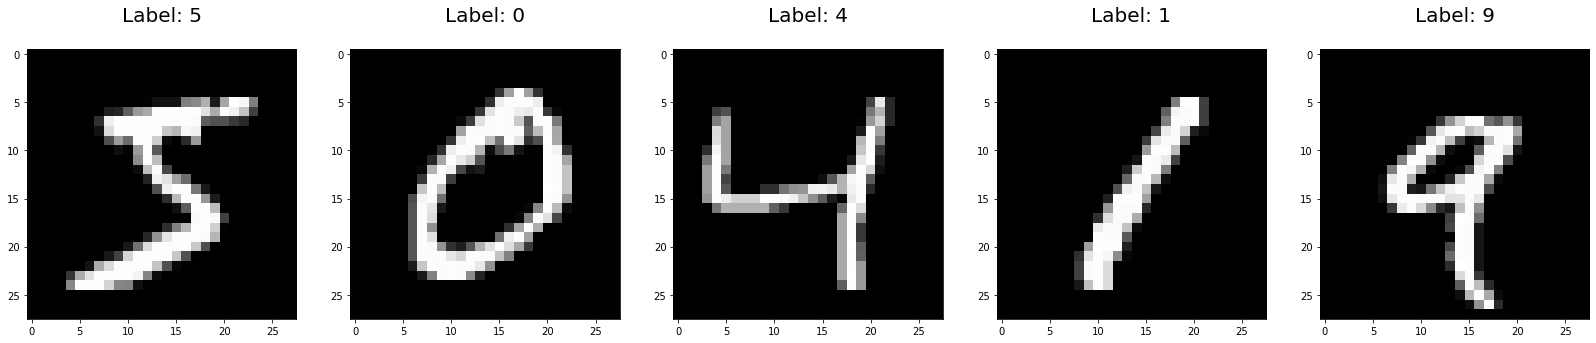

In [5]:
plt.figure(figsize=(28,28))
for index, (image, label) in enumerate(zip(x_train[:5], y_train[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize=20)

Let's transform the label into binary values using one-hot encoding

In [6]:
def one_hot(y):
    label = np.zeros((y.shape[0], 10))
    label[np.arange(10)==y] = 1
    return label

y_train = one_hot(y_train)
y_test = one_hot(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Let's create our model!!

## Model architecture

In this project, we will use 784 neurons in the input layer which corresponds to the total number of pixels of the 28x28 input image, 10 neurons in the hidden layer, and 10 neurons in the output layer which corresponds to 10 classes (0–9).

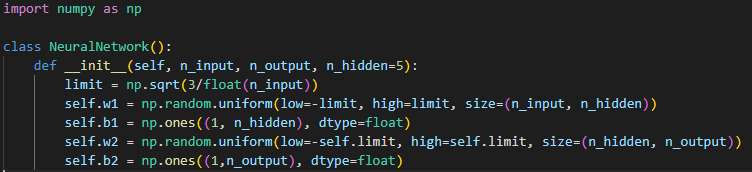

Our NeuralNetwork class takes two parameters which are n_input and n_output, each of which represents the number of neurons in the input and output layer.
Our class also takes one optional parameter, n_hidden representing the number of neurons in the hidden layer. We'll set the default value of n_hidden by five, but we can change it as we wish.

We then create our parameters (weights and biases). We use NumPy random function to initialize the values of our weight matrices, and we set the initial value of our bias vector by 1.


## Activation function in the hidden layer
We use the sigmoid function for the neurons in the hidden layer

**Math**
$$f_{\text{sigmoid}}(x) = \frac 1{1 + e^{-x}}$$
**Code**
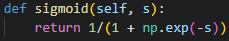

## Activation function in the output layer
We use the softmax function for the neurons in the output layer

**Math**
$$f_{\text{softmax}}(x) = \frac {e^{a_i}}{\sum \limits _{j=1} ^{N} e^{a_j}}$$
**Code**
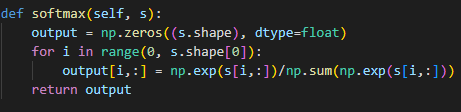

## Forward propagation
In this process, we propagate the signal from the input layer to the output layer using a series of mathematical formulas and make a prediction. 

**Math**

$$Z^{(1)} = X W^{(1)}  + b^{(1)}$$
$$A^{(1)} = f_\text{sigmoid}\big(Z^{(1)}\big)$$
$$Z^{(2)} = A^{(1)} W^{(2)}  + b^{(2)}$$
$$A^{(2)} = f_\text{softmax}\big(Z^{(2)}\big)$$

**Code**
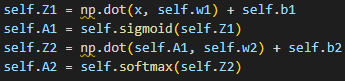

# Calculate the loss function

**Math**
$$L=-y\ln{f{(Z^{(2)}})} - (1-y)\ln{(1-{f{(Z^{(2)}})})}$$

**Code**
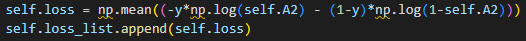

# Backpropagation

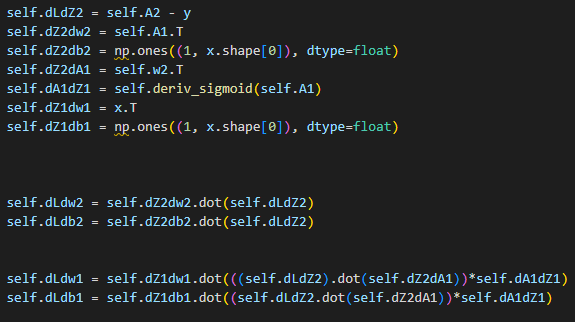

# Update parameters
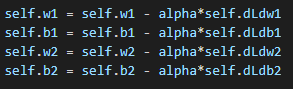

Here is our complete neural network class

In [7]:
class NeuralNetwork():
    def __init__(self, n_input, n_output, n_hidden=5):
        limit = np.sqrt(3/float(n_input))
        self.w1 = np.random.uniform(low=-limit, high=limit, size=(n_input, n_hidden))
        self.b1 = np.ones((1, n_hidden), dtype=float)        
        self.w2 = np.random.uniform(low=limit, high=limit, size=(n_hidden, n_output))
        self.b2 = np.ones((1,n_output), dtype=float)

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

    def deriv_sigmoid(self, s):
        return s*(1-s)

    def softmax(self, s):
        output = np.zeros((s.shape), dtype=float)
        for i in range(0, s.shape[0]):
            output[i,:] = np.exp(s[i,:])/np.sum(np.exp(s[i,:]))
        return output
    
    def fit(self, x, y, epoch=100, alpha=0.0001):
        self.loss_list = []
        for i in range(epoch):
            self.Z1 = np.dot(x, self.w1) + self.b1
            self.A1 = self.sigmoid(self.Z1)
            self.Z2 = np.dot(self.A1, self.w2) + self.b2
            self.A2 = self.softmax(self.Z2)
            
            self.loss = np.mean((-y*np.log(self.A2) - (1-y)*np.log(1-self.A2)))
            self.loss_list.append(self.loss)
            print('Iteration: {} Loss: {:.2f}'.format(i, self.loss)) if i%10==0 else None
        
            self.dLdZ2 = self.A2 - y
            self.dZ2dw2 = self.A1.T
            self.dZ2db2 = np.ones((1, x.shape[0]), dtype=float)
            self.dZ2dA1 = self.w2.T
            self.dA1dZ1 = self.deriv_sigmoid(self.A1)
            self.dZ1dw1 = x.T
            self.dZ1db1 = np.ones((1, x.shape[0]), dtype=float)



            self.dLdw2 = self.dZ2dw2.dot(self.dLdZ2)
            self.dLdb2 = self.dZ2db2.dot(self.dLdZ2)


            self.dLdw1 = self.dZ1dw1.dot(((self.dLdZ2).dot(self.dZ2dA1))*self.dA1dZ1)
            self.dLdb1 = self.dZ1db1.dot((self.dLdZ2.dot(self.dZ2dA1))*self.dA1dZ1)

            self.w1 = self.w1 - alpha*self.dLdw1
            self.b1 = self.b1 - alpha*self.dLdb1
            self.w2 = self.w2 - alpha*self.dLdw2
            self.b2 = self.b2 - alpha*self.dLdb2
            
    def predict(self, x):
        self.Z1 = np.dot(x, self.w1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.w2) + self.b2
        output = self.softmax(self.Z2)
        return output

# Let's train our model

In [8]:
epoch=100

model = NeuralNetwork(x_train.shape[1], y_train.shape[1], n_hidden=10)
model.fit(x_train, y_train, epoch, alpha=0.00009)
loss = np.round(model.loss_list, 2)

Iteration: 0 Loss: 0.33
Iteration: 10 Loss: 0.29
Iteration: 20 Loss: 0.23
Iteration: 30 Loss: 0.17
Iteration: 40 Loss: 0.14
Iteration: 50 Loss: 0.12
Iteration: 60 Loss: 0.10
Iteration: 70 Loss: 0.10
Iteration: 80 Loss: 0.10
Iteration: 90 Loss: 0.08


# Let's plot the loss vs epoch (iteration) graph 

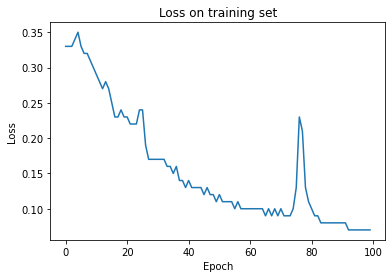

In [9]:
plt.plot(np.arange(epoch), loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss on training set')
plt.show()

From the graphic, we can see that our model's loss is decreasing over time. This means that our model can generalize the data.

# Let's get the prediction of our model

In [10]:
predictions = model.predict(x_test)
predictions[predictions>0.5] = 1
predictions[predictions<0.5] = 0
predictions[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Let's see the accuracy of our model

In [11]:
accuracy = np.sum(predictions==y_test)/y_test.size
print(accuracy*100)

97.92999999999999


The accuracy of more than 97% is not bad for a neural network made from scratch

# Let's see the some output images with their labels

In [12]:
def inverse_one_hot(label):
    output = np.zeros((label.shape[0],1))
    for i in range(output.shape[0]):
        output[i] = np.argmax(label[i])
    return output
predictions = inverse_one_hot(predictions)
labels = inverse_one_hot(y_test)

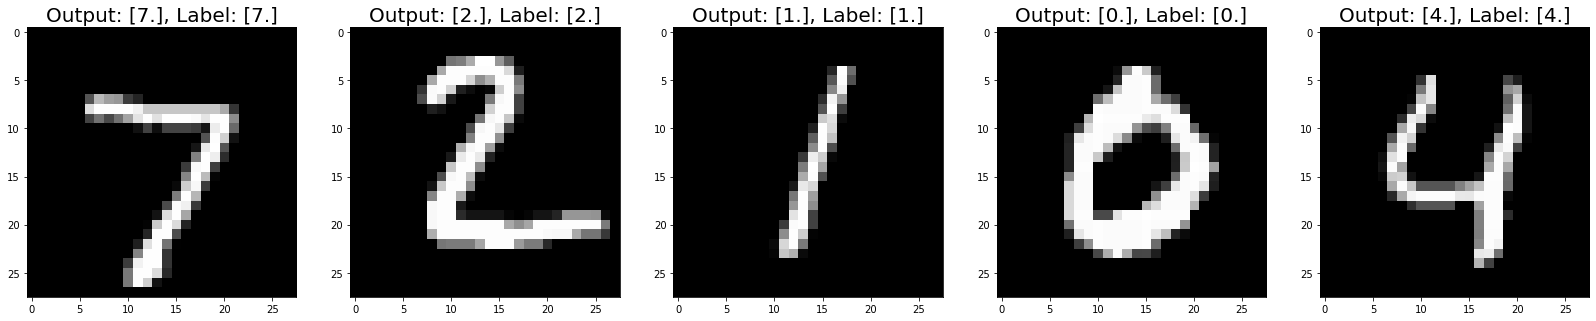

In [28]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, labels):
    if predict==actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(28,28))
for plotIndex, wrong in enumerate(classifiedIndex[:5]):
    plt.subplot(1,5, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (28,28)), cmap=plt.cm.gray)
    plt.title('Output: {}, Label: {}'.format(predictions[wrong], labels[wrong]), fontsize=20)

That's it. We've successfully created our neural network model from scratch for digits classification in the MNIST dataset. I hope that all the explanations of math and code in this project can help you understand the concept behind neural networks.